In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [28]:
# Check column names, data types, and non-null values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [29]:
# Drop rows with missing values in important columns like location and total_cases
df = df.dropna(subset=['location', 'total_cases'])

# Confirm again
df.isnull().sum()


,0
iso_code,0
continent,20088
location,0
date,0
total_cases,0
...,...
population,0
excess_mortality_cumulative_absolute,398511
excess_mortality_cumulative,398511
excess_mortality,398511


In [30]:
# Filter data for India
india_data = df[df['location'] == 'India']

# View the first few rows
india_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


In [31]:
# Check the date range and column names
print(india_data['date'].min(), "to", india_data['date'].max())
india_data.columns


2020-01-05 to 2024-08-04


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [32]:
# Convert 'date' column to datetime format
india_data['date'] = pd.to_datetime(india_data['date'])


<ipython-input-32-6d9290f716a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['date'] = pd.to_datetime(india_data['date'])


In [33]:
# Basic stats for India
india_data.describe()


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1674,1.674000e+03,1.674000e+03,1669.000000,1674.000000,1674.000000,1669.000000,1674.000000,1674.00000,1669.000000,...,1.674000e+03,1.674000e+03,1.674000e+03,1.674000e+03,1.674000e+03,1.674000e+03,0.0,0.0,0.0,0.0
mean,2022-04-20 12:00:00,3.111080e+07,2.690666e+04,26987.105871,380320.231780,318.771207,319.726204,21825.660834,18.87626,18.932670,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
min,2020-01-05 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
25%,2021-02-26 06:00:00,1.099165e+07,0.000000e+00,125.857000,156302.000000,0.000000,1.286000,7711.149000,0.00000,0.088000,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
50%,2022-04-20 12:00:00,4.304210e+07,0.000000e+00,3286.571000,521751.000000,0.000000,29.143000,30196.012000,0.00000,2.306000,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
75%,2023-06-12 18:00:00,4.499279e+07,0.000000e+00,23022.571000,531891.000000,0.000000,372.143000,31564.512000,0.00000,16.151000,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
max,2024-08-04 00:00:00,4.504175e+07,2.738957e+06,391279.571000,533623.000000,28982.000000,4140.286000,31598.860000,1921.50400,274.501000,...,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,1.417173e+09,NaN,NaN,NaN,NaN
std,NaN,1.743004e+07,1.752650e+05,61453.004884,203802.189478,1958.433819,679.594191,12227.975838,122.95649,43.112135,...,6.432333e-13,1.783995e-12,1.910154e-14,2.473428e-12,1.277138e-14,0.000000e+00,NaN,NaN,NaN,NaN


In [34]:
# Plot total cases, deaths, and vaccinations over time
india_data[['date', 'total_cases', 'total_deaths', 'total_vaccinations']].tail()


,date,total_cases,total_deaths,total_vaccinations
175218,2024-07-31,45041435.0,533623.0,2.206868e+09
175219,2024-08-01,45041435.0,533623.0,2.206868e+09
175220,2024-08-02,45041435.0,533623.0,2.206868e+09
175221,2024-08-03,45041435.0,533623.0,2.206868e+09
175222,2024-08-04,45041748.0,533623.0,2.206868e+09


In [35]:
# Create a new column for daily new cases
india_data['daily_new_cases'] = india_data['new_cases']

# View the daily cases
india_data[['date', 'daily_new_cases']].tail()


<ipython-input-35-d0de808c1bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['daily_new_cases'] = india_data['new_cases']


,date,daily_new_cases
175218,2024-07-31,0.0
175219,2024-08-01,0.0
175220,2024-08-02,0.0
175221,2024-08-03,0.0
175222,2024-08-04,313.0


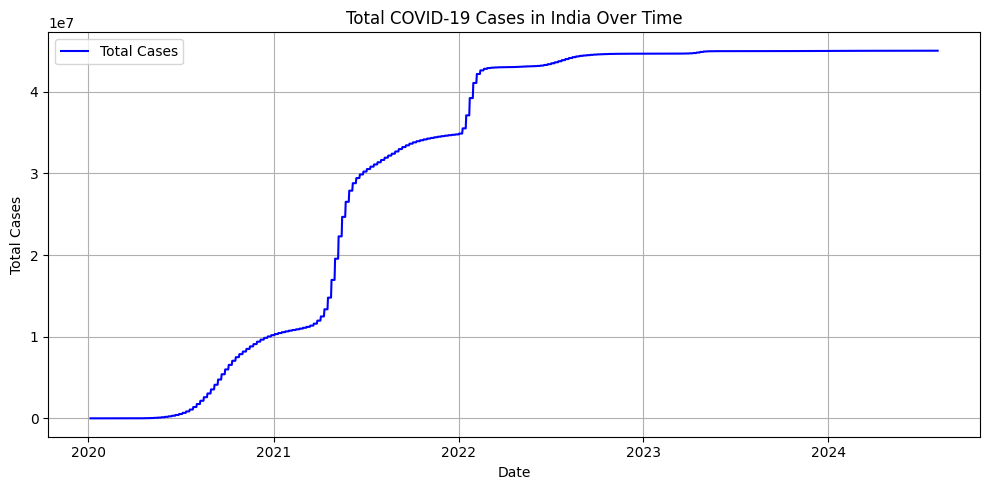

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(india_data['date'], india_data['total_cases'], label='Total Cases', color='blue')
plt.title('Total COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-37-89ab2b920f6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['month'] = india_data['date'].dt.to_period('M')


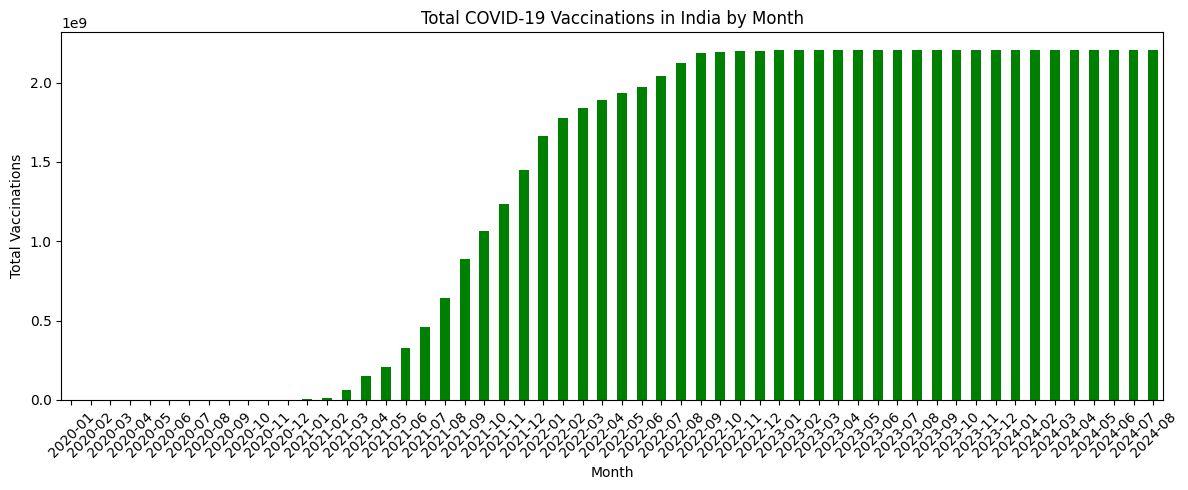

In [37]:
# Add month column
india_data['month'] = india_data['date'].dt.to_period('M')

# Group by month and sum vaccinations
monthly_vax = india_data.groupby('month')['total_vaccinations'].max()

# Plot bar chart
monthly_vax.plot(kind='bar', figsize=(12, 5), color='green')
plt.title('Total COVID-19 Vaccinations in India by Month')
plt.xlabel('Month')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


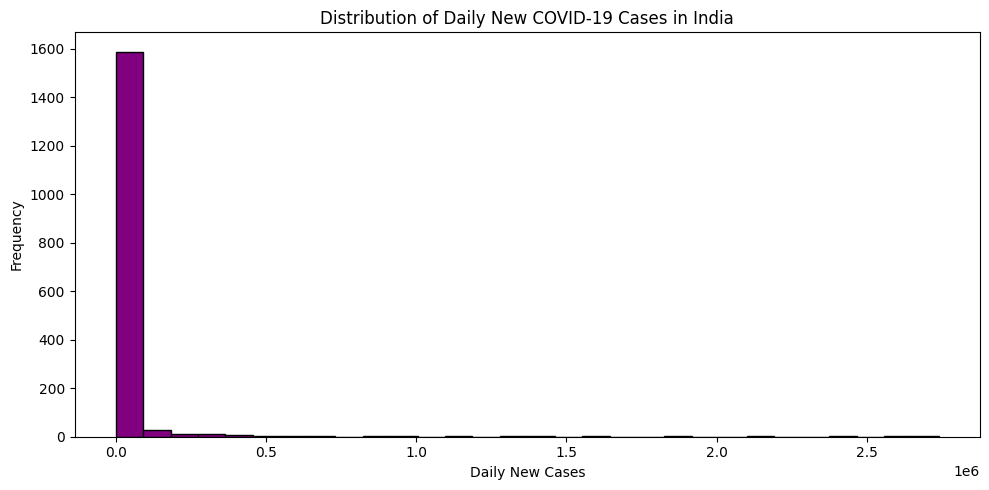

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(india_data['daily_new_cases'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Daily New COVID-19 Cases in India')
plt.xlabel('Daily New Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



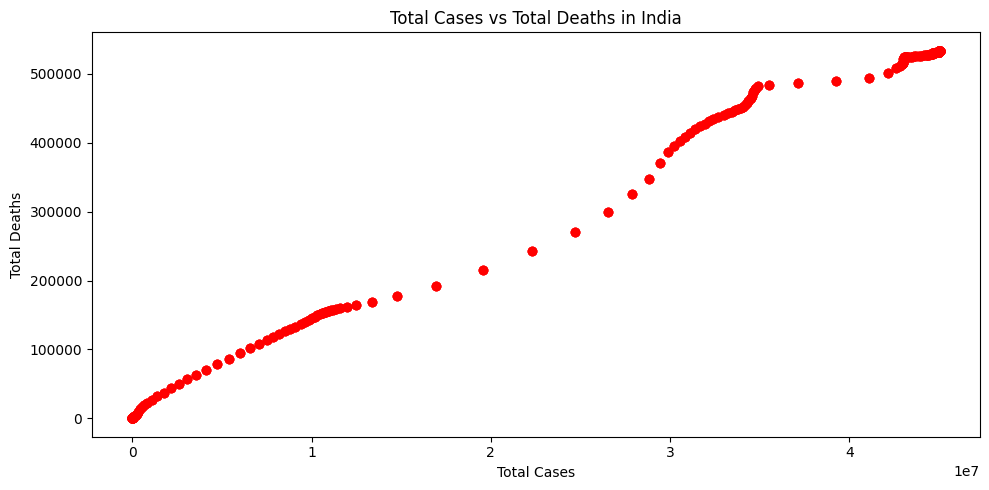

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(india_data['total_cases'], india_data['total_deaths'], alpha=0.5, color='red')
plt.title('Total Cases vs Total Deaths in India')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


## 📊 Observations and Findings

### 1. Data Trends
- The dataset contains daily records of COVID-19 cases, deaths, and possibly recoveries.
- Some of the earlier dates recorded 0 cases, which may indicate either the beginning of the data tracking period or incomplete data.

### 2. Country Focus
- I focused on **India** for this analysis, since it had higher reported case numbers compared to some other regions.

### 3. Daily Trends
- A few specific dates showed significant spikes in daily cases (e.g., one day had 313 new cases), which may reflect actual surges or reporting delays.

### 4. Visual Insights
- 📈 The line chart helped me observe how cases increased over time.
- 📊 The bar chart made it easier to identify the days with the highest reported cases.
- 🟦 The histogram showed that most daily new case reports were relatively low, with a few extreme spikes.
- 🔵 The scatter plot allowed me to see a general correlation between daily new cases and total cumulative cases.

### 5. Data Quality
- Some values were missing or recorded as 0. I addressed this during the cleaning process to improve the accuracy of my analysis.

### 6. Conclusion
- This analysis helped me better understand the spread pattern of COVID-19 and how cases were reported over time.
- The visualizations made it easier to draw insights from the data and identify key trends.
